In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('C:/Users/HP/Desktop/hackathon/titanic dataset/train.csv')

In [3]:
test_data = pd.read_csv('C:/Users/HP/Desktop/hackathon/titanic dataset/test.csv')
    

In [4]:
data.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
rows = data.shape[1]
rows

12

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

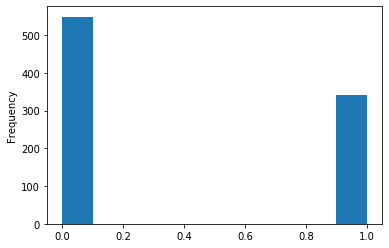

In [7]:
data['Survived'].plot.hist()

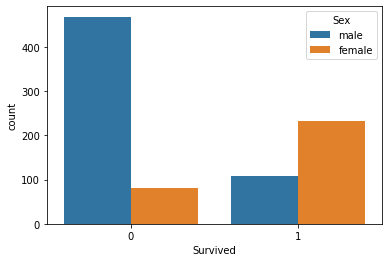

In [8]:
sns.countplot(x ='Survived',hue = 'Sex',data = data )

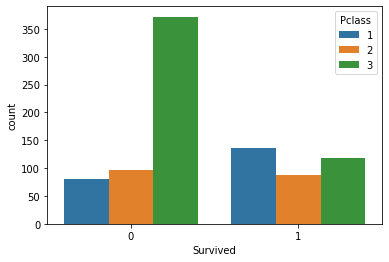

In [9]:
sns.countplot(x = 'Survived',hue= 'Pclass',data = data)

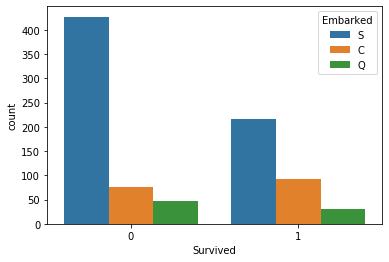

In [10]:
sns.countplot(x = 'Survived',hue = 'Embarked',data = data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Wrangling

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

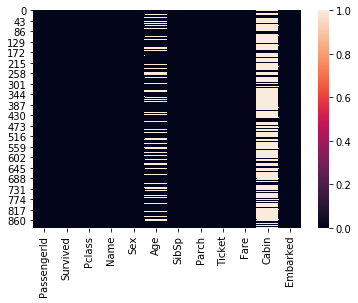

In [13]:
sns.heatmap(data.isnull())

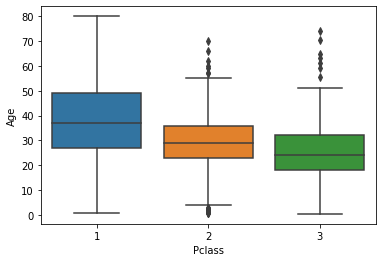

In [14]:
sns.boxplot(x = "Pclass",y = 'Age',data = data)

In [15]:
#dropin cabin,Name,Ticket column
data.drop(['Cabin','Name',"Ticket"],axis = 1,inplace = True)


In [16]:
data.dropna(inplace = True)

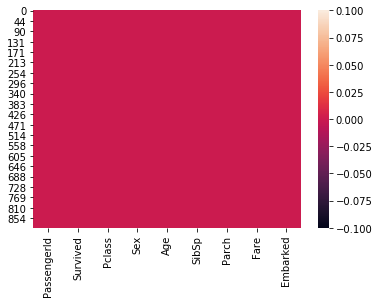

In [17]:
sns.heatmap(data.isnull())

In [18]:
data.shape
data.drop('PassengerId',axis = 1,inplace = True)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
male = pd.get_dummies(data['Sex'],drop_first=True)

In [21]:
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
embark = pd.get_dummies(data['Embarked'],drop_first = True)
Class = pd.get_dummies(data['Pclass'],drop_first = True)

In [23]:
data = pd.concat([data,Class,male,embark],axis = 1)

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,1


In [25]:
data.drop(['Pclass','Sex','Embarked'],axis = 1,inplace = True)

In [26]:
data.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


# train data

In [27]:
x = data.drop(['Survived'],axis = 1)
y = data['Survived']

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [34]:
classifier = SGDClassifier()
classifier.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
output = classifier.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
result = accuracy_score(y_test,output)

In [42]:
result

0.5700934579439252

In [43]:
Rforest = RandomForestClassifier()

In [44]:
Rforest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred = Rforest.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.780373831775701